# Quora Questions pair

# Description
Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.

Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

Currently, Quora uses a Random Forest model to identify duplicate questions. In this competition, Kagglers are challenged to tackle this natural language processing problem by applying advanced techniques to classify whether question pairs are duplicates or not. Doing so will make it easier to find high quality answers to questions resulting in an improved experience for Quora writers, seekers, and readers.

# Problem Statement
    >Need to find the questions which are similar in nature to tag the similar questions

# Machine Learning Intution
- Data will be in a file Train.csv(source: https://www.kaggle.com/c/quora-question-pairs/data)
- Train.csv file contains 5 columns : qid1, qid2, question1, question2, is_duplicate
- Size of Train.csv - 60MB



# EDA

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Reading train.csv file
df = pd.read_csv("train_quora.csv")
print("Number of data points in Training dataset is :",df.shape[0])

Number of data points in Training dataset is : 404290


In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Data set has 6 columns in training datset.
ID :describe a simple id
qid1,qid2 : this represents the id to questions 
question1,question2: this is teh textual representaion of questions which need to be check and alayized

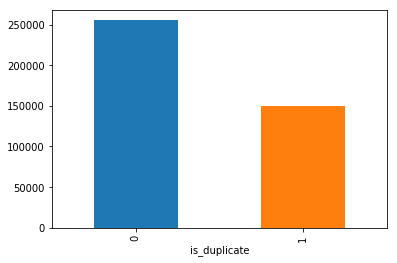

In [6]:
#Number of duplicate(smilar) and non-duplicate(non similar) questions

df.groupby("is_duplicate")['id'].count().plot.bar()

In [7]:
print(' Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))


 Question pairs are not Similar (is_duplicate = 0):
   63.08%

 Question pairs are Similar (is_duplicate = 1):
   36.92%


# Unique Questions


In [14]:
pd.Series(df['qid1'].tolist()).count()

404290

In [15]:
pd.Series(df['qid2'].tolist()).count()

404290

In [27]:
#get the total questions
totalQ=pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

In [28]:
totalQ

0              1
1              3
2              5
3              7
4              9
5             11
6             13
7             15
8             17
9             19
10            21
11            23
12            25
13            27
14            29
15            31
16            33
17            35
18            37
19            39
20            41
21            43
22            45
23            47
24            49
25            51
26            53
27            55
28            57
29            59
           ...  
808550       691
808551    124172
808552    466328
808553    537906
808554    537908
808555     16064
808556    146284
808557    290649
808558    537910
808559    349794
808560     35364
808561    537914
808562     14005
808563    537916
808564     87385
808565    537917
808566    308365
808567    537918
808568    169786
808569    537921
808570    537923
808571     81495
808572     16773
808573    537925
808574    537927
808575    379845
808576    155606
808577    5379

In [29]:
unique_qsn = len(np.unique(totalQ))

In [34]:
print("Total number of unique questions in the trainign dataset is  : ",unique_qsn)

Total number of unique questions in the trainign dataset is  :  537933


In [35]:
qs_morethan_onetime = np.sum(totalQ.value_counts() > 1)
qs_morethan_onetime

111780

In [36]:
print ('Max number of times a single question is repeated in the datset is : {}\n'.format(max(totalQ.value_counts()))) 

Max number of times a single question is repeated in the datset is : 157



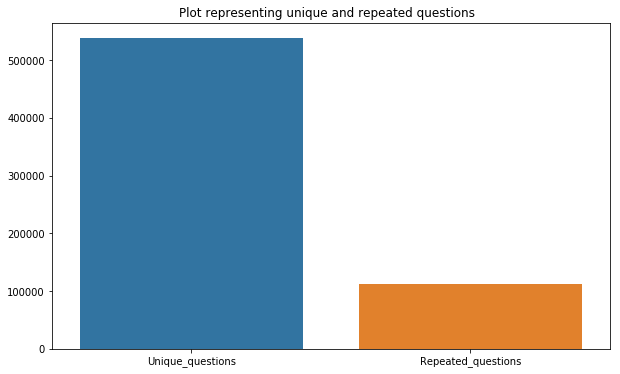

In [37]:
x = ["Unique_questions" , "Repeated_questions"]
y =  [unique_qsn , qs_morethan_onetime]
#plotting figure and assigning size
plt.figure(figsize=(10, 6))
#Placing title name
plt.title ("Plot representing unique and repeated questions  ")
#introducing bar plot for duplicate and non duplicate(1)
sns.barplot(x,y)
#showing plot
plt.show()

# Number of occurrences of each question

Text(0,0.5,'Total Number of questions')

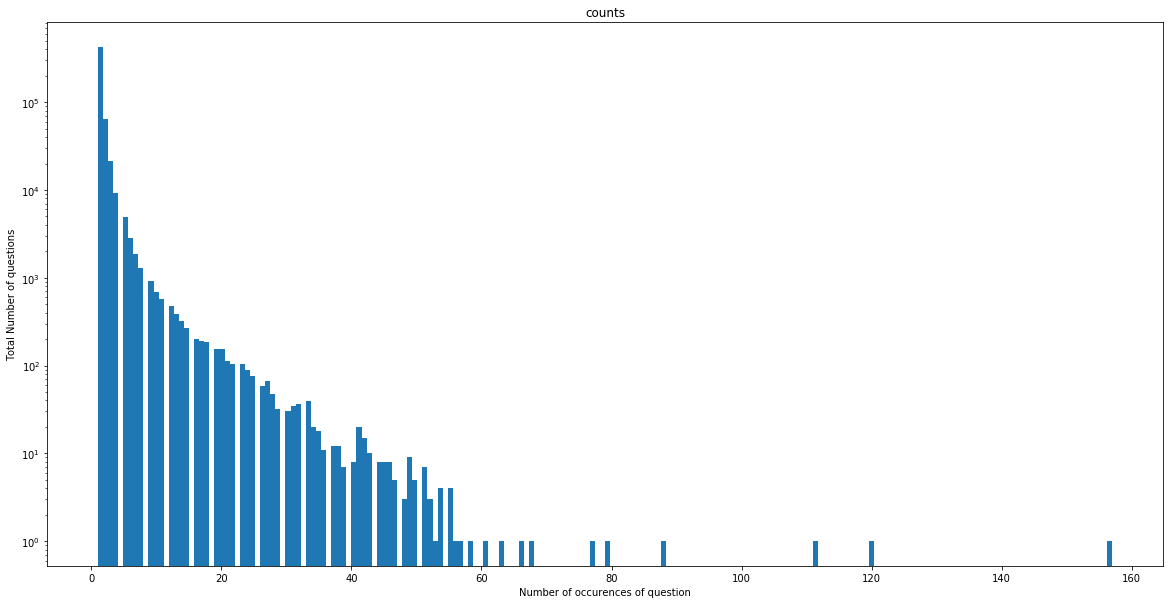

In [45]:
plt.figure(figsize=(20, 10))

plt.hist(totalQ.value_counts(), bins=200)

plt.yscale('log', nonposy='clip')

plt.title('counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Total Number of questions')

It can be seen that there are only few questions which has occured many number of time.

# Checking for NULL Values

In [51]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [61]:
nan_rows = df[df.isnull().any(1)]

In [62]:
nan_rows.count()

id              3
qid1            3
qid2            3
question1       2
question2       1
is_duplicate    3
dtype: int64

In [63]:
nan_rows

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0
